In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/MEX_GOB_2017.csv', encoding='latin1', skiprows=6)
catalogo = pd.read_csv('data/Cat_Candidatos_Gobernador.csv', encoding='ISO-8859-1')

In [3]:
data.columns

Index(['id_estado', 'estado', 'id_distrito_local', 'distrito_local', 'seccion',
       'id_casilla', 'tipo_casilla', 'extraordinariacontigua',
       'ubicacion_casilla', 'tipo_de_acta', 'boletas_sobrantes',
       'total_ciudadanos_votaron', 'num_boletas_extraidas', 'pan', 'pri',
       'prd', 'pt', 'pvem', 'na', 'morena', 'pes', 'c_pri_pvem_na_pes',
       'c_pri_pvem_na', 'c_pri_pvem_pes', 'c_pri_na_pes', 'c_pri_pvem',
       'c_pri_na', 'c_pri_pes', 'c_pvem_na_pes', 'c_pvem_na', 'c_pvem_pes',
       'c_na_pes', 'cand_ind_1', 'no_registrados', 'nulos', 'total_votos',
       'lista_nominal', 'observaciones', 'contabilizada',
       'mecanismo_de_traslado', 'sha', 'fecha_hora_acopio',
       'fecha_hora_captura', 'fecha_hora_registro'],
      dtype='object')

In [4]:
d_locales = data[['id_distrito_local','distrito_local']].drop_duplicates()

In [5]:
d_locales_unique = data[['distrito_local']].drop_duplicates()

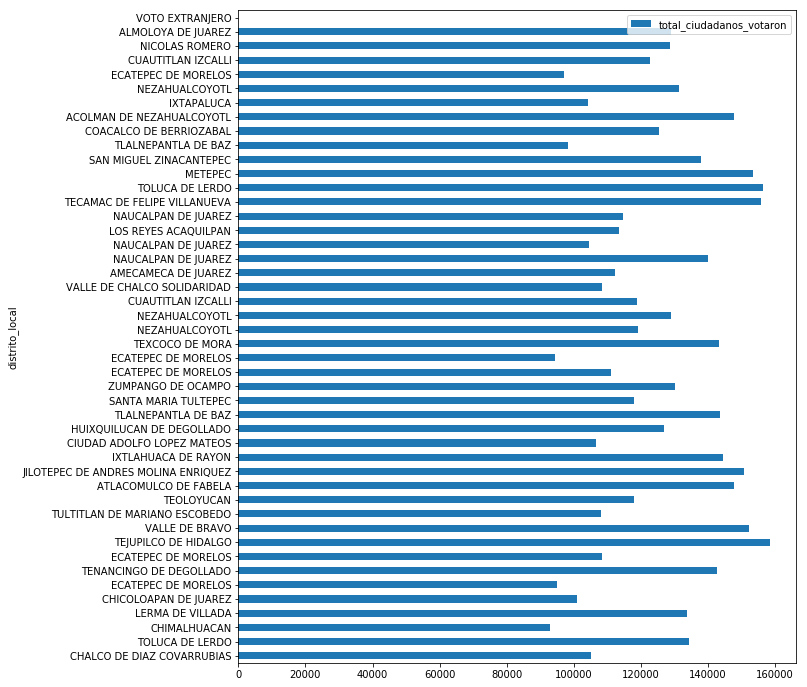

In [6]:
%matplotlib inline
data.groupby('id_distrito_local').total_ciudadanos_votaron.sum().reset_index()\
.merge(d_locales, on='id_distrito_local')\
.plot(kind='barh', x='distrito_local', y='total_ciudadanos_votaron', figsize=(10,12));

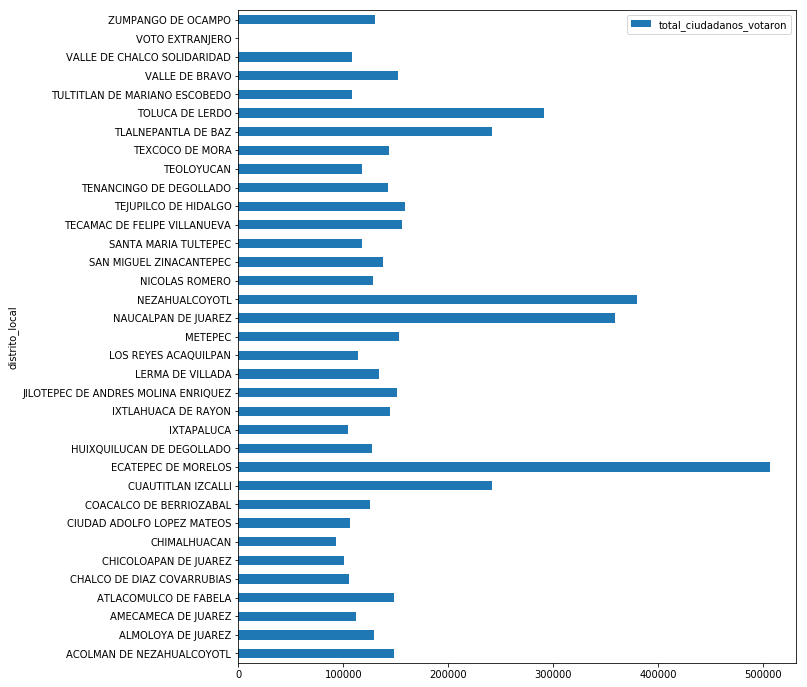

In [7]:
%matplotlib inline
data.groupby('distrito_local').total_ciudadanos_votaron.sum().reset_index()\
.plot(kind='barh', x='distrito_local', y='total_ciudadanos_votaron', figsize=(10,12));

In [9]:
import pandas as pd
import pandas_profiling
import numpy as np

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [10]:
rep = pandas_profiling.ProfileReport(data)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

In [13]:
savpath='./profiling.html'
rep.to_file(savpath)

In [50]:
data.columns

Index(['id_estado', 'estado', 'id_distrito_local', 'distrito_local', 'seccion',
       'id_casilla', 'tipo_casilla', 'extraordinariacontigua',
       'ubicacion_casilla', 'tipo_de_acta', 'boletas_sobrantes',
       'total_ciudadanos_votaron', 'num_boletas_extraidas', 'pan', 'pri',
       'prd', 'pt', 'pvem', 'na', 'morena', 'pes', 'c_pri_pvem_na_pes',
       'c_pri_pvem_na', 'c_pri_pvem_pes', 'c_pri_na_pes', 'c_pri_pvem',
       'c_pri_na', 'c_pri_pes', 'c_pvem_na_pes', 'c_pvem_na', 'c_pvem_pes',
       'c_na_pes', 'cand_ind_1', 'no_registrados', 'nulos', 'total_votos',
       'lista_nominal', 'observaciones', 'contabilizada',
       'mecanismo_de_traslado', 'sha', 'fecha_hora_acopio',
       'fecha_hora_captura', 'fecha_hora_registro'],
      dtype='object')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


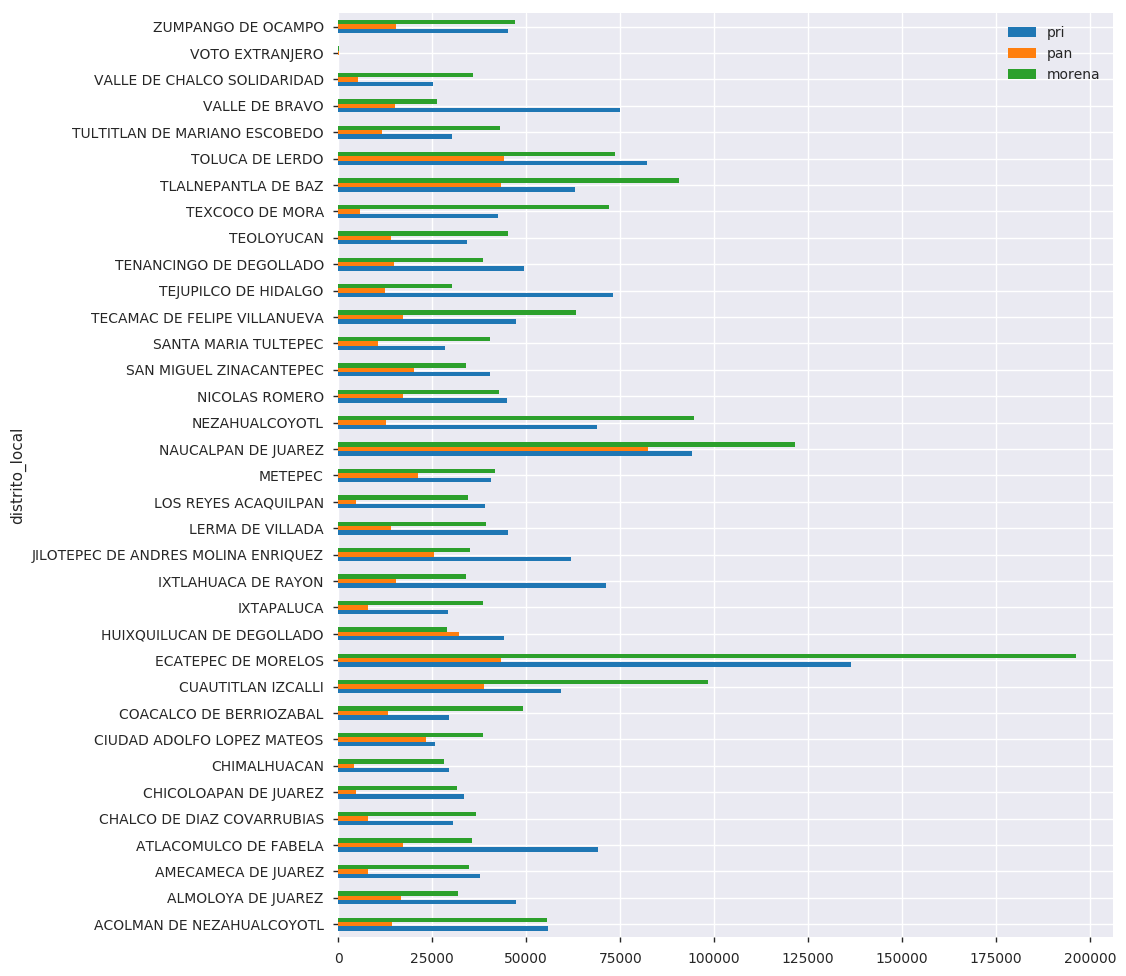

In [53]:
partidos = ['pri', 'pan', 'morena']
# partidos = ['pan', 'pri','prd', 'pt', 'pvem', 'na', 'morena', 'pes']
sub_data = data.copy()
sub_data = sub_data.replace('ILEGIBLE','0').replace('SIN DATO','0')
for c in partidos:
    sub_data[c] = sub_data[c].astype(float)

x_var = 'distrito_local'
sub_data.groupby(x_var).sum().reset_index()\
.plot(kind='barh', x=x_var, y=partidos, figsize=(10,12));

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


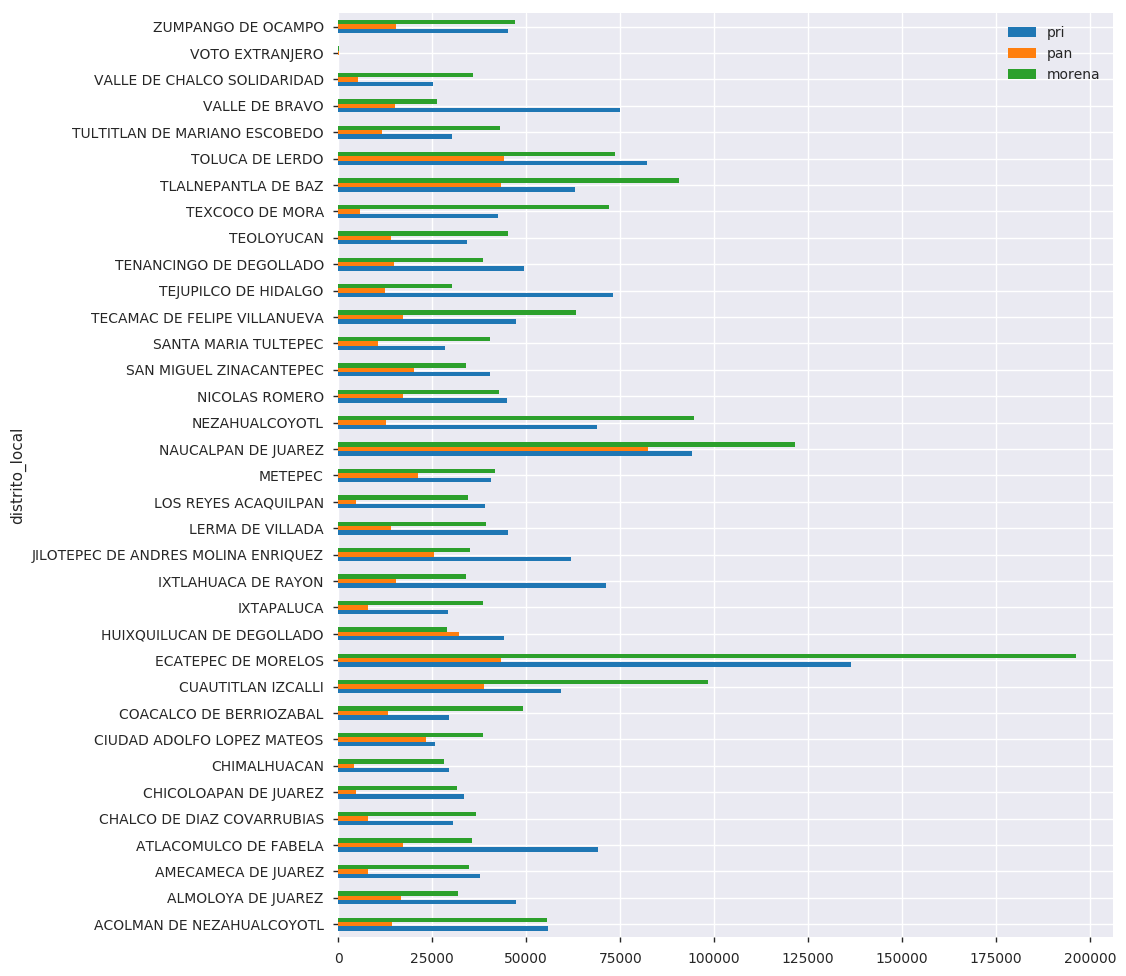